In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import leastsq
from scipy import ndimage
from func import *

In [60]:
def central_pix_tab(obj,x0,y0,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    data = [x0,y0]
    column_names={'x0':0,'y0':1}
    columns=[]
    for key in column_names.keys():
        columns.append(fits.Column(name=key,format='E',array=[data[column_names[key]]]))
    coldefs = fits.ColDefs(columns)
    hdu = fits.BinTableHDU.from_columns(coldefs)
    hdu.writeto('%s/%s/%s_AGNpix.fits'%(destination_path_cube,obj,obj),overwrite=True)

def agn_brightest_pixel(QSO_cube,wo_cube,wo_wave,z):
    QSO_slice = QSO_cube[1841,:,:]
    k = 1 + z
    [guess_y,guess_x] = ndimage.measurements.maximum_position(QSO_slice)
        
    select = (wo_wave>4980*k) & (wo_wave<5020*k) 
    wo_cube = wo_cube[select]
    print (np.shape(wo_cube))
    test_cube = wo_cube[:,2*guess_y-2:2*guess_y+3,2*guess_x-2:2*guess_x+3]
    test_slice = test_cube[1,:,:]
    [y0,x0] = ndimage.measurements.maximum_position(test_slice)
    [yn,xn] = (y0+2*guess_y-2,x0+2*guess_x-2)
        #(xn,yn) = brightest_pixel(QSO_cube,wo_cube,wo_wave,z)
    return xn,yn  

def updated_agn_brightest_pixel(QSO_cube,wo_cube,wo_wave,z):
    QSO_slice = QSO_cube[1841,:,:]
    wo_slice = wo_cube[1841,:,:]
    amp = np.max(QSO_slice)
    k = 1 + z
    [y0,x0] = ndimage.measurements.maximum_position(wo_slice)
    [leny,lenx] = [np.shape(wo_cube)[1],np.shape(wo_cube)[2]]
    y, x = np.mgrid[:leny, :lenx]  
    p_init = models.Gaussian2D(amp,x0,y0,2.2,2.2,0)
    f = fitting.LevMarLSQFitter()
    p = f(p_init, x, y, wo_slice)
    [amp_out,x0_out,y0_out,x_std,y_std,theta]= p.parameters
    plt.imshow(wo_slice[y0-5:y0+6,x0-5:x0+6],origin='lower')
    plt.show()
    print (x0_out,y0_out)
    (xn,yn) = (int(round(x0_out)),int(round(y0_out)))
    return (xn,yn)

In [63]:
def algorithm_script(obj,z,prefix_path_cube="/media/mainak/Seagate/ftp.hidrive.strato.com/users/login-carsftp/IFU_data",destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    print ('%s'%(obj))
    try:
        (orig_cube,orig_err,orig_wave,orig_header) = loadMainCube('%s/MUSE/%s/%s.binned.fits'%(prefix_path_cube,obj,obj))
    except IOError:
        (orig_cube,orig_err,orig_wave,orig_header) = loadMainCube('%s/MUSE/%s/%s.unbinned.fits'%(prefix_path_cube,obj,obj))   
    (cont_cube,cont_err,cont_wave,cont_header) = loadCube('%s/MUSE/%s/fitting/full/%s.cont_model.fits'%(prefix_path_cube,obj,obj))
    (QSO_cube,QSO_err,QSO_wave,QSO_header) = loadCube('%s/MUSE/%s/%s.QSO_full.fits'%(prefix_path_cube,obj,obj))
    (wo_cube,wo_err,wo_wave,wo_header) = loadCube('%s/%s/%s.wo_absorption.fits'%(destination_path_cube,obj,obj)) 
    (x1,y1) = agn_brightest_pixel(QSO_cube,wo_cube,wo_wave,z)

    (x0,y0) = alternative_brightest_pixel(orig_cube)
    (xn,yn) = updated_agn_brightest_pixel(QSO_cube,wo_cube,wo_wave,z)
    print (x0,y0)
    print (xn,yn)
    central_pix_tab(obj,xn,yn)


In [7]:
z = {"HE0021-1819":0.053197,"HE0108-4743":0.02392,"HE0114-0015":0.04560,"HE0119-0118":0.054341,"HE0224-2834":0.059800
    ,"HE0227-0913":0.016451,"HE0232-0900":0.043143,"HE0253-1641":0.031588,"HE0345+0056":0.031,"HE0351+0240":0.036
    ,"HE0412-0803":0.038160,"HE0429-0247":0.042009,"HE0433-1028":0.035550,"HE0853+0102":0.052,"HE0934+0119":0.050338
    ,"HE1011-0403":0.058314,"HE1017-0305":0.049986,"HE1029-1831":0.040261,"HE1107-0813":0.058,"HE1108-2813":0.024013
    ,"HE1126-0407":0.061960,"HE1237-0504":0.009,"HE1248-1356":0.01465,"HE1330-1013":0.022145,"HE1353-1917":0.035021
    ,"HE1417-0909":0.044,"HE2211-3903":0.039714,"HE2222-0026":0.059114,"HE2233+0124":0.056482,"HE2302-0857":0.046860}

objs = z.keys()


for obj in objs:
     algorithm_script(obj,z[obj]) 


HE0021-1819
(2, 315, 319)
117 153
116 153
HE0108-4743
(3, 157, 158)
79 79
79 79
HE0114-0015
(2, 315, 320)
167 162
167 161
HE0119-0118
(3, 220, 220)
113 80
113 80
HE0224-2834
(2, 157, 161)
81 77
81 77
HE0227-0913
(2, 219, 220)
115 87
115 87
HE0232-0900
(3, 158, 159)
67 51
67 51
HE0253-1641
(3, 156, 157)
96 41
96 41
HE0345+0056
(2, 157, 158)
79 80
79 80
HE0351+0240
(2, 157, 157)
75 93
75 93
HE0412-0803
(3, 316, 319)
179 160
179 160
HE0429-0247
(2, 158, 159)
75 82
75 82
HE0433-1028
(2, 315, 317)
150 157
150 157
HE0853+0102
(3, 315, 317)
162 116
162 116
HE0934+0119
(3, 315, 320)
155 163
155 163
HE1011-0403
(2, 439, 436)
189 222
189 222
HE1017-0305
(2, 317, 320)
87 109
87 109
HE1029-1831
(3, 314, 316)
155 218
155 218
HE1107-0813
(2, 316, 322)
161 158
161 158
HE1108-2813
(3, 314, 316)
158 152
158 152
HE1126-0407
(2, 158, 161)
76 80
76 80
HE1237-0504
(3, 445, 441)
228 224
228 224
HE1248-1356
(3, 315, 319)
161 162
161 161
HE1330-1013
(3, 315, 319)
157 160
157 160
HE1353-1917
(2, 401, 397)
199 

HE0108-4743
(33, 315, 318)


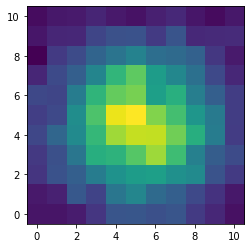

160.15688476028785 159.51266809320404
159 160
160 160


In [64]:
z = {"HE0108-4743":0.02392}

objs = z.keys()


for obj in objs:
     algorithm_script(obj,z[obj]) 
